# 画像から検出

In [1]:
import cv2
import torch
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
param_path = "YOLOv5_medaka_detection.pt"
model = torch.hub.load('ultralytics/yolov5', 'custom', path=param_path)

Using cache found in C:\Users\tsutsui riku/.cache\torch\hub\ultralytics_yolov5_master
requirements: matplotlib>=3.2.2 not found and is required by YOLOv5, attempting auto-update...
requirements: Command 'pip install 'matplotlib>=3.2.2' ' returned non-zero exit status 1.
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
requirements: Command 'pip install 'PyYAML>=5.3.1' ' returned non-zero exit status 1.
requirements: pandas>=1.1.4 not found and is required by YOLOv5, attempting auto-update...
requirements: Command 'pip install 'pandas>=1.1.4' ' returned non-zero exit status 1.
requirements: seaborn>=0.11.0 not found and is required by YOLOv5, attempting auto-update...
requirements: Command 'pip install 'seaborn>=0.11.0' ' returned non-zero exit status 1.
YOLOv5  2022-4-29 torch 1.10.1+cu113 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11264MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients
Adding AutoShape... 


In [3]:
path = 'medaka.jpeg' 
img=cv2.imread(path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
results = model(img)

In [4]:
results.save("medaka.png")

Saved 1 image to runs\detect\exp5


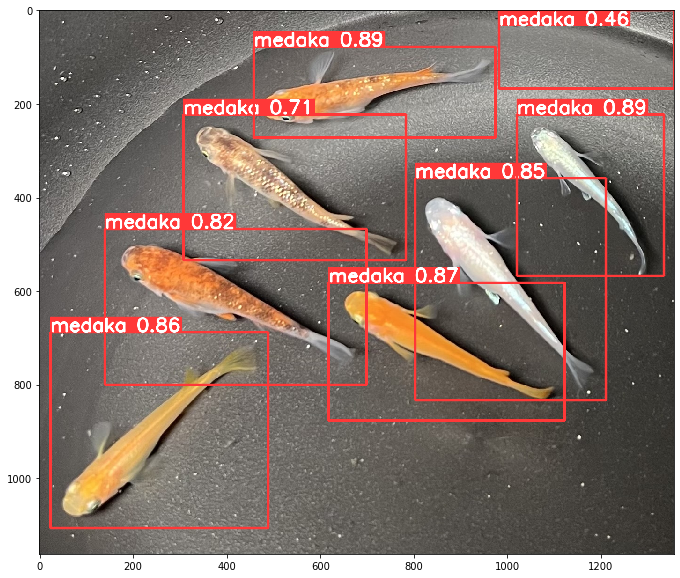

In [5]:
%matplotlib inline
plt.figure(figsize=(12,10))
plt.imshow(results.imgs[0])
plt.show()

# 動画から検出

In [6]:
from tqdm import tqdm
import cv2
import torch
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

param_path = "YOLOv5_medaka_detection.pt"
model = torch.hub.load('ultralytics/yolov5', 'custom', path=param_path)

path = 'medaka_mov.mp4'
cap = cv2.VideoCapture(path)

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

#フレームレート取得
fps = cap.get(cv2.CAP_PROP_FPS)
print(fps)
#フレーム数
count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
print(count)
#フォーマット指定
fmt = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
writer = cv2.VideoWriter('output.mp4', fmt, fps, (width, height))

for _ in tqdm(range(int(count))):
    ret, img = cap.read()
    #動画が終われば処理終了
    if ret == False:
        break  
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    results = model(img)
    results.render()
    img=results.imgs[0]
    img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    writer.write(img)

cap.release()
writer.release()
cv2.destroyAllWindows()

Using cache found in C:\Users\tsutsui riku/.cache\torch\hub\ultralytics_yolov5_master
requirements: matplotlib>=3.2.2 not found and is required by YOLOv5, attempting auto-update...
requirements: Command 'pip install 'matplotlib>=3.2.2' ' returned non-zero exit status 1.
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
requirements: Command 'pip install 'PyYAML>=5.3.1' ' returned non-zero exit status 1.
requirements: pandas>=1.1.4 not found and is required by YOLOv5, attempting auto-update...
requirements: Command 'pip install 'pandas>=1.1.4' ' returned non-zero exit status 1.
requirements: seaborn>=0.11.0 not found and is required by YOLOv5, attempting auto-update...
requirements: Command 'pip install 'seaborn>=0.11.0' ' returned non-zero exit status 1.
YOLOv5  2022-4-29 torch 1.10.1+cu113 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11264MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients
Adding AutoShape... 


29.97002997002997
511.0


100%|████████████████████████████████████████████████████████████████████████████████| 511/511 [00:28<00:00, 18.04it/s]
